<a href="https://colab.research.google.com/github/TanyaYadav/Deep-Learning-Projects/blob/main/Sports_Person_Classifier_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Sports Person Classifier Model***

###***Importing necessary libraries***

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

###***Getting any random image and checking its dimensions***

In [ ]:
img=cv2.imread('/content/drive/MyDrive/Sports_Person_Classifier_Model/test/sharapova2.jpg')
img.shape

(1646, 1920, 3)

###***Showing the image***

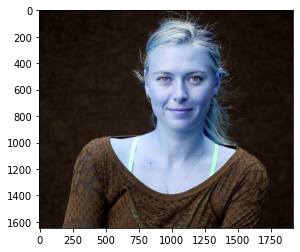

In [ ]:
plt.imshow(img)

###***Converting the image into grayscale and checking its dimensions***

In [ ]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(1646, 1920)

In [ ]:
gray

array([[ 4,  4,  4, ...,  3,  3,  3],
       [ 4,  4,  4, ...,  3,  3,  3],
       [ 4,  4,  4, ...,  3,  3,  3],
       ...,
       [15, 15, 15, ..., 11, 11, 11],
       [15, 15, 15, ..., 11, 11, 11],
       [15, 15, 15, ..., 11, 11, 11]], dtype=uint8)

###***Showing the grayscale image***

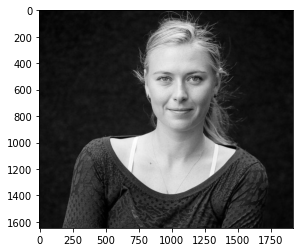

In [ ]:
plt.imshow(gray,cmap='gray')

###***Getting face_cascade and eye_cascade to detect face and eyes in image***

In [ ]:
face_cascade=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [ ]:
faces=face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[742, 271, 618, 618]], dtype=int32)

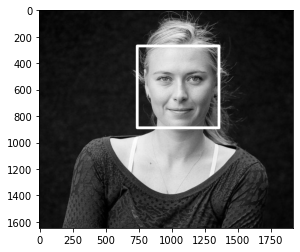

In [ ]:
(x,y,w,h)=faces[0]
face_img=cv2.rectangle(gray,(x,y),(x+w,y+h),color=(255,0,0),thickness=20)
plt.imshow(face_img,cmap='gray')

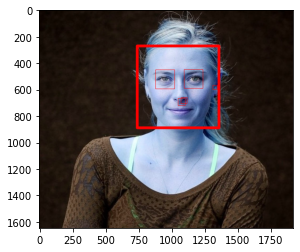

In [ ]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
  face_img=cv2.rectangle(img,(x,y),(x+w,y+h),color=(255,0,0),thickness=20)
  roi_gray=gray[y:y+h,x:x+w]
  roi_color=face_img[y:y+h,x:x+w]
  eyes=eye_cascade.detectMultiScale(roi_gray)
  for (ex,ey,ew,eh) in eyes:
    cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),color=(255,0,0),thickness=2)

plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()


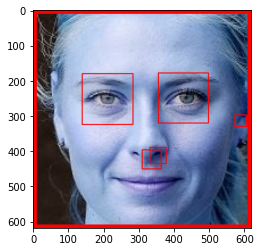

In [ ]:
plt.imshow(roi_color,cmap='gray')

###***Function for getting cropped image***

In [ ]:
def get_cropped_img_if_2_eyes(image_path):
  img=cv2.imread(image_path)
  gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  faces=face_cascade.detectMultiScale(gray,1.3,5)
  for (x,y,w,h) in faces:
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=img[y:y+h,x:x+w]
    eyes=eye_cascade.detectMultiScale(roi_gray)
    if (len(eyes)>=2):
      return roi_color

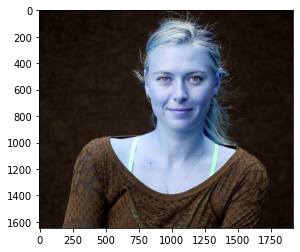

In [ ]:
original_image=cv2.imread('/content/drive/MyDrive/Sports_Person_Classifier_Model/test/sharapova2.jpg')
plt.imshow(original_image)

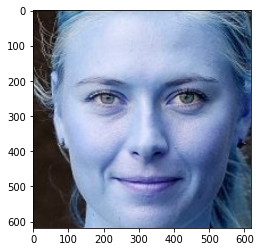

In [ ]:
cropped_img=get_cropped_img_if_2_eyes('/content/drive/MyDrive/Sports_Person_Classifier_Model/test/sharapova2.jpg')
plt.imshow(cropped_img)

In [ ]:
cropped_img_with_no_eyes=get_cropped_img_if_2_eyes('/content/drive/MyDrive/Sports_Person_Classifier_Model/test/sharapova1.jpg')
cropped_img_with_no_eyes

In [ ]:
path_to_data="/content/drive/MyDrive/Sports_Person_Classifier_Model/dataset"
path_to_cr_data="/content/drive/MyDrive/Sports_Person_Classifier_Model/cropped/"


In [ ]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
  if entry.is_dir():
    img_dirs.append(entry.path)
     


In [ ]:
img_dirs

['/content/drive/MyDrive/Sports_Person_Classifier_Model/dataset/lionel_messi',
 '/content/drive/MyDrive/Sports_Person_Classifier_Model/dataset/maria_sharapova',
 '/content/drive/MyDrive/Sports_Person_Classifier_Model/dataset/roger_federer',
 '/content/drive/MyDrive/Sports_Person_Classifier_Model/dataset/serena_williams',
 '/content/drive/MyDrive/Sports_Person_Classifier_Model/dataset/virat_kohli']

In [ ]:
import shutil
if os.path.exists(path_to_cr_data):
  shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [ ]:
cropped_image_dirs=[]
celebrity_file_names_dict={}
for img_dir in img_dirs:
  count=1
  celebrity_name=img_dir.split('/')[-1]
  print(celebrity_name)
  celebrity_file_names_dict[celebrity_name]=[]
  for entry in os.scandir(img_dir):
    roi_color=get_cropped_img_if_2_eyes(entry.path)
    if roi_color is not None:
      cropped_folder=path_to_cr_data+celebrity_name
      if not os.path.exists(cropped_folder):
        os.makedirs(cropped_folder)
        cropped_image_dirs.append(cropped_folder)
        print("Generating cropped image in folder: ",cropped_folder)
      cropped_file_name=celebrity_name +str(count)+".png"
      cropped_file_path=cropped_folder + "/" + cropped_file_name
      cv2.imwrite(cropped_file_path,roi_color)
      celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
      count+=1

lionel_messi
Generating cropped image in folder:  /content/drive/MyDrive/Sports_Person_Classifier_Model/cropped/lionel_messi
maria_sharapova
Generating cropped image in folder:  /content/drive/MyDrive/Sports_Person_Classifier_Model/cropped/maria_sharapova
roger_federer
Generating cropped image in folder:  /content/drive/MyDrive/Sports_Person_Classifier_Model/cropped/roger_federer
serena_williams
Generating cropped image in folder:  /content/drive/MyDrive/Sports_Person_Classifier_Model/cropped/serena_williams
virat_kohli
Generating cropped image in folder:  /content/drive/MyDrive/Sports_Person_Classifier_Model/cropped/virat_kohli


In [ ]:
import numpy as np
import pywt
import cv2

In [ ]:
def w2d(img,mode='haar',level=1):
  imArray=img
  imArray=cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
  imArray=np.float32(imArray)
  imArray/=255;
  coeffs=pywt.wavedec2(imArray,mode,level=level)
  coeffs_H=list(coeffs)
  coeffs_H[0]*=0;
  imArray_H=pywt.waverec2(coeffs_H,mode);
  imArray_H*=255;
  imArray_H=np.uint8(imArray_H)
  return imArray_H


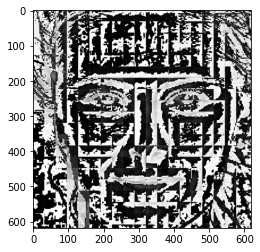

In [ ]:
im_har=w2d(cropped_img,'db1',5)
plt.imshow(im_har,cmap='gray')

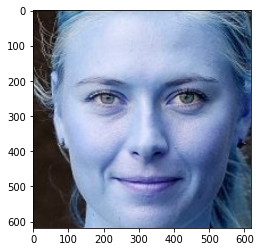

In [ ]:
plt.imshow(cropped_img,cmap='gray')

In [ ]:
celebrity_file_names_dict

{'lionel_messi': ['/content/drive/MyDrive/Sports_Person_Classifier_Model/cropped/lionel_messi/lionel_messi1.png',
  '/content/drive/MyDrive/Sports_Person_Classifier_Model/cropped/lionel_messi/lionel_messi2.png',
  '/content/drive/MyDrive/Sports_Person_Classifier_Model/cropped/lionel_messi/lionel_messi3.png',
  '/content/drive/MyDrive/Sports_Person_Classifier_Model/cropped/lionel_messi/lionel_messi4.png',
  '/content/drive/MyDrive/Sports_Person_Classifier_Model/cropped/lionel_messi/lionel_messi5.png',
  '/content/drive/MyDrive/Sports_Person_Classifier_Model/cropped/lionel_messi/lionel_messi6.png',
  '/content/drive/MyDrive/Sports_Person_Classifier_Model/cropped/lionel_messi/lionel_messi7.png',
  '/content/drive/MyDrive/Sports_Person_Classifier_Model/cropped/lionel_messi/lionel_messi8.png',
  '/content/drive/MyDrive/Sports_Person_Classifier_Model/cropped/lionel_messi/lionel_messi9.png',
  '/content/drive/MyDrive/Sports_Person_Classifier_Model/cropped/lionel_messi/lionel_messi10.png',
  '

In [ ]:
class_dict={}
count=0
for celebrity_name in celebrity_file_names_dict.keys():
  class_dict[celebrity_name]=count
  count=count+1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [ ]:
x=[]
y=[]
for celebrity_name,training_files in celebrity_file_names_dict.items():
  for training_image in training_files:
    img=cv2.imread(training_image)
    if img is None:
      continue
    scalled_raw_image=cv2.resize(img,(32,32))
    img_har=w2d(img,'db1',5)
    scalled_img_har=cv2.resize(img_har,(32,32))
    combined_img=np.vstack((scalled_raw_image.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
    x.append(combined_img)
    y.append(celebrity_name)


In [ ]:
len(x[0])

4096

In [ ]:
x[0]

array([[ 23],
       [ 25],
       [ 26],
       ...,
       [241],
       [  8],
       [  0]], dtype=uint8)

In [ ]:
x=np.array(x).reshape(len(x),4096).astype(float)
x.shape

(154, 4096)

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [ ]:
pipe=Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel='rbf',C=10))])
pipe.fit(x_train,y_train)
pipe.score(x_test,y_test)

0.6153846153846154

In [ ]:
print(classification_report(y_test,pipe.predict(x_test)))

                 precision    recall  f1-score   support

   lionel_messi       0.70      0.78      0.74         9
maria_sharapova       0.42      0.89      0.57         9
  roger_federer       1.00      0.33      0.50         9
serena_williams       0.50      0.20      0.29         5
    virat_kohli       1.00      0.71      0.83         7

       accuracy                           0.62        39
      macro avg       0.72      0.58      0.59        39
   weighted avg       0.73      0.62      0.60        39



In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
model_params={
    'svm':{
        'model':svm.SVC(gamma='auto',probability=True),
        'params':{
            'svc__C':[1,10,100,1000],
            'svc__kernel':['rbf','linear']
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'randomforestclassifier__n_estimators':[1,5,10]
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'logisticregression__C':[1,5,10]
        }

    }
}

In [ ]:
scores=[]
best_estimators={}
import pandas as pd
for algo,mp in model_params.items():
  pipe=make_pipeline(StandardScaler(),mp['model'])
  clf=GridSearchCV(pipe,mp['params'],cv=5,return_train_score=False)
  clf.fit(x_train,y_train)
  scores.append({
      'model':algo,
      'best_score':clf.best_score_,
      'best_params':clf.best_params_
  })
  best_estimators[algo]=clf.best_estimator_
df=pd.DataFrame(scores,columns=['model','best_score','best_params'])
df


,model,best_score,best_params
0,svm,0.756522,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.608696,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.756522,{'logisticregression__C': 1}


In [ ]:
best_estimators

{'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))])}

In [ ]:
best_estimators['svm'].score(x_test,y_test)

0.6923076923076923

In [ ]:
best_estimators['random_forest'].score(x_test,y_test)

0.5384615384615384

In [ ]:
best_estimators['logistic_regression'].score(x_test,y_test)

0.7692307692307693

In [ ]:
best_clf=best_estimators['svm']

###***Getting confusion matrix for best classifier***

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,best_clf.predict(x_test))
cm

array([[7, 2, 0, 0, 0],
       [2, 6, 0, 1, 0],
       [2, 1, 6, 0, 0],
       [0, 3, 0, 2, 0],
       [1, 0, 0, 0, 6]])

###***Heatmap for the above confusion matrix***

Text(69.0, 0.5, 'Truth')

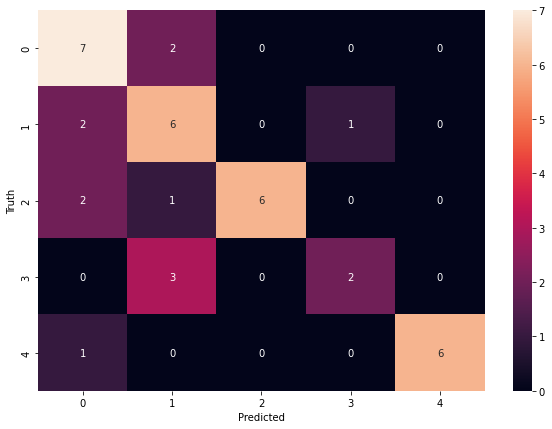

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

###***Saving the above generated model***

In [ ]:
!pip install joblib
import joblib
joblib.dump(best_clf,'saved_model.pkl')

['saved_model.pkl']

In [ ]:
import json
with open("class_dictionary.json","w") as f:
  f.write(json.dumps(class_dict))